# **PROJECT - 002**

## **0. Project Details**
**Project Name:** Wine Qualtiy Prediction
<br>**Team Name:** Arm is Strong
<br>**Team Members:** Nitin Rawat
<br>**Starting Date:** 13-FEB-2024
<br>**Objective:**
<br>&nbsp;&nbsp;&nbsp;&nbsp;**1.** Given wine dataset including multivales such as fixed acidity, volitile acidity,..., quality; we have to develop machine learning model which can later predict quality of wine using the input paratmers.
<br>&nbsp;&nbsp;&nbsp;&nbsp;**2.** This will enable wine makers an understanding of wine quality for a given combination of incredients etc.
<br>**Machine Learning Method:** A set of historical dataset provided with incredients and wine quality and predicting quality of wine using any other combination becomes an application of Supervise Machine Leanrnign.
<br>**Type of Supervise Learning:** Since quality of wine ranging from 0 to 10, we could have gone through continuous supervised learning. but we been asked to label wheather combination yeilds good wine or not.
<br>&nbsp;&nbsp;&nbsp;&nbsp;**1.** A wine will be considered as good if quailty is scored more than equal to 6 else a bad wine.
<br>&nbsp;&nbsp;&nbsp;&nbsp;**2.** Therefore, this will be perfect case of Classification Supervised Machine Learning

## **1. Importing Modules**

In [1]:
# Data Manipulatoin Module
import pandas as pd
import numpy as np

# Data Visualization Moduel
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning Algorithms
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Machine Learning Performance Measure
from sklearn.metrics import confusion_matrix, classification_report

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **2. Reading Input File**
**Accessing Kaggle data through Colab:** Reference [link](https://saturncloud.io/blog/how-to-use-kaggle-datasets-in-google-colab/)

In [2]:
!pip install kaggle

**Down load Kaggle API token and upload in colab**
<br> Kaggle API will be available in setting -> Create API
<br>Below code line has been added and not present in the reference like, to clean the older API
<br>**!rm -rf /root/.kaggle.**

In [3]:
# copy kaggle.json to /root/.kaggle/ folder so that kaggle cli can access it.
!rm -rf /root/.kaggle.
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Get this api call from kaggle's download dataset
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 65.9MB/s]


In [5]:
!unzip red-wine-quality-cortez-et-al-2009.zip

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [6]:
wine = pd.read_csv('/content/winequality-red.csv')

## **3. Input Data Viewing**

In [7]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **4. Metholodgy**
Following steps to complete the wine data prediction project:
<br>1. Data Cleaning: [click](https://www.obviously.ai/post/data-cleaning-in-machine-learning)
<br>2. Exploratory Analysis (EDA): [click](https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/)
<br>3. Feature Selection: [click](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)
<br>4. Focuing on classification machine learning algorigthm such as
<br>&nbsp;&nbsp;&nbsp;&nbsp;4.1. Random Forest Classification
<br>&nbsp;&nbsp;&nbsp;&nbsp;4.2. Stochastic Gradient Descent Classifier
<br>&nbsp;&nbsp;&nbsp;&nbsp;4.3. Support Vector Machine (SVM)
<br>5. Data Standarization and reiterating step 4
<br>6. Model Optimization
<br>7. Model Evaluation
<br>8. Conculsion

### **4.1. Data Cleaning**
**Quesion**: Why Data Cleaning important?
<br>Preparing data such as organizing, formatting data ensures data quality which in returns making more accurate analytics, increasing effective, intelligent decision making

#### **4.1.1. Duplication Check**
This process involve identifying duplicated records, making sure these data sets won't affects our model.
<br>There are ways to handle this, but we will be follow below:
<br>1. **Deleting Duplicated Records**

In [9]:
# Deleting Duplicated Records

# printing total number of records with the following ways
# shape fuction returns tuple count of (rows, columns)
print('Total number of records', wine.shape[0])
# or
# len function also provide the total number of records in an object
len(wine)

# Python duplicated function returns the records with duplicated values
print('Total number of duplicated records', wine.duplicated().sum())

#--------- Inferenece -----------------
# As count of duplicated records stands 240 out of total number of records 1599
# Contributing towards 15 percentatge , but we will drop these records as it might impact our models

wine = wine.drop_duplicates(keep='first')


Total number of records 1599
Total number of duplicated records 240


#### **4.1.2. Filter Outliers**
**Outliers** are unexpected data values present in the data set.
<br> while identifying them becomes important, but more importantly how and why to handle them becomes more critical.
<br> Currently, we are using below techniques to handle identifier:
<br>**1. Min-Max Approach**

##### **Box Plot and Min-Max Approach:**
**Approach**: Min-Max approach majorly compares mean and median value using describe in-built function. Since mean and median are central tendency, hence in a way we are performing **Descriptive Statistical Analysis** to highlight column with potential outliers

##### **STEP 001**: **Identifying Outliers**

In [10]:
# This is just to print min, max and index of the data set
for index, col_min, col_max in zip(wine.min().index, wine.min() , wine.max()):
  # Below will help to left-aligned within a field width of 25 characters
  # Similarly, centre and right will follow ^ and > symbol respectively
  print(f'{index:<25} {col_min:<10} {col_max:<5}')


fixed acidity             4.6        15.9 
volatile acidity          0.12       1.58 
citric acid               0.0        1.0  
residual sugar            0.9        15.5 
chlorides                 0.012      0.611
free sulfur dioxide       1.0        72.0 
total sulfur dioxide      6.0        289.0
density                   0.99007    1.00369
pH                        2.74       4.01 
sulphates                 0.33       2.0  
alcohol                   8.4        14.9 
quality                   3.0        8.0  


In [11]:
# Using describe function to get min, max, quartile data set to apply Min-Max Approach filltering outliers
wine.describe(include='all').T #T - tranpose of data

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


From above describe(), we can see following data sets having issues:
<br>1. **residual sugar**: larger difference between min-max and 25, 50, 75 percentile values i.e. median values.
<br>2. **free sulfur dioxide**: large gap between min-max and median value
<br>3. **total sulfur dioxide**: large gap between min-max and median value

##### **STEP 002: Visualizing in Charts**

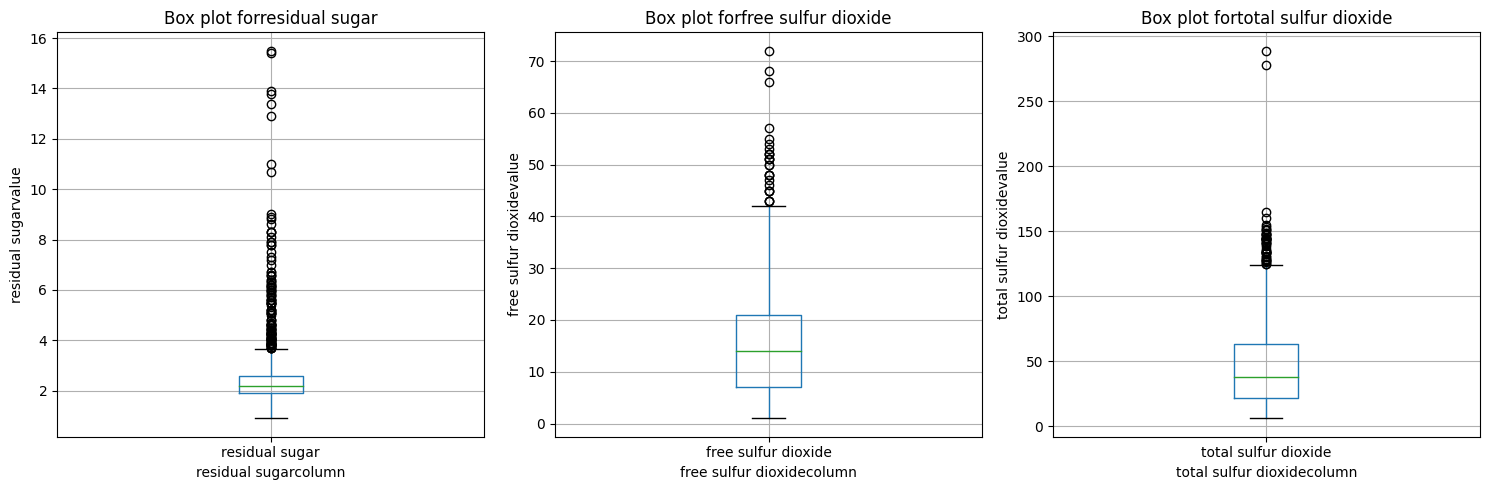

In [12]:
# As we are performing descriptive analysis (insight extraction on population or complete data set)
# for data type: continunous quantitative or numerical
# the appropriate chart would be box plot for outliers and providing min and max values
col_names = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']

# Create a figure and three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through categories and create box plots
for i, column_name in zip(range(len(col_names)), col_names):
  ax = axes[i]
  wine.boxplot(column= column_name, ax=ax)
  ax.set_title('Box plot for' + column_name)
  ax.set_xlabel(column_name + 'column')
  ax.set_ylabel(column_name + 'value')

plt.tight_layout()
plt.show()

##### **STEP 003: Handling Outliers - IQR Technique**
Below are the techniques applied to handle outliers:
<br>**1. Dropping data columns**
<br>**Logic 01:** Dropping columns where percentage of outliers (using IQR outlier detection) is greater than some threshold (taking 6 for current case)
<br>**Logic 02:** Dropping records instead of column when detected as outliers
<br>**Implemented:** Code for both logic written below, but for the given case, Logic 01 has been implemented; because on logic 02 implementation all records for quality column more than value 6 are dropped, hence creating issues with our analysis

In [13]:
# Applying these logic to input columns
output_column = 'quality'
input_columns = list(wine.columns)

# Removing output column from list of potential input to the models
input_columns.remove(output_column)

In [14]:
# Logic 02: Dropping records instead of column when detected as outliers

# Creating a new variable to drop outlier affected columns
# Moreover, keeping actual data intact
wine_outlier_pruned = wine
summary = wine_outlier_pruned.describe()

# Initializing 'upper_bound' and 'lower_bound' rows with NaN values
summary.loc['lower_bound'] = pd.Series(index=summary.columns, dtype=float)
summary.loc['upper_bound'] = pd.Series(index=summary.columns, dtype=float)

for column_name in summary:
  Q1 = summary[column_name]['25%']
  Q3 = summary[column_name]['75%']

  # Computing interquartile range
  IQR = Q3 - Q1

  # Computing upper and lower bound whisker values
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR

  # Adding lower and upper bound values to summary data frame
  summary[column_name]['upper_bound'] = upper_bound
  summary[column_name]['lower_bound'] = lower_bound

# Keeping records which lies between lower and upper bound as for the corresponding columns
for column_name in summary:
  if column_name != output_column:
    wine_outlier_pruned = wine_outlier_pruned[(summary[column_name]['lower_bound'] <= wine_outlier_pruned[column_name])  &
                                                          (wine_outlier_pruned[column_name] <= summary[column_name]['upper_bound'])]


**Drop Outliers data percentage is 26%** but we will still continue with trimmed dataset for futher analysis, as orignial data is avialble for performance comparision metrics

In [15]:
# Drop percentage of data:
print('Dropped percentage after outlier technique applied: ', round((100*(len(wine) - len(wine_outlier_pruned))) /len(wine), 2), '%', sep='')

Dropped percentage after outlier technique applied: 25.02%


In [16]:
# Logic 01: Dropping columns where percentage of outliers (using IQR outlier detection) is greater than some threshold

# Creating a new variable to drop outlier affected columns
# Moreover, keeping actual data intact
wine_outlier_pruned = wine
summary = wine_outlier_pruned.describe()

# Initializing 'upper_bound' and 'lower_bound' rows with NaN values
summary.loc['lower_bound'] = pd.Series(index=summary.columns, dtype=float)
summary.loc['upper_bound'] = pd.Series(index=summary.columns, dtype=float)

for column_name in summary:
  Q1 = summary[column_name]['25%']
  Q3 = summary[column_name]['75%']

  # Computing interquartile range
  IQR = Q3 - Q1

  # Computing upper and lower bound whisker values
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR

  summary[column_name]['upper_bound'] = upper_bound
  summary[column_name]['lower_bound'] = lower_bound

# If number of records percentage say x is greater than a certain value say threshold we will drop those columns
threshold = 6
for column_name in summary:
  # calculate number of outliers:
  # outliers less than lower and greater than upper bound
  no_outliers = ( (wine_outlier_pruned[column_name] < summary[column_name]['lower_bound']) | (summary[column_name]['upper_bound'] < wine_outlier_pruned[column_name]) ).sum()
  perc_outliers = (100*no_outliers)/len(wine_outlier_pruned)


  if perc_outliers > threshold and column_name != output_column:
    print('Column name:', column_name)
    print('outlier number:', no_outliers)
    print('total records:', len(wine_outlier_pruned))
    print('total outlier percentage: ', round(perc_outliers, 2), '%', sep='')
    print('-'*100)

    wine_outlier_pruned = wine_outlier_pruned.drop(columns = column_name)

    # Removing column from list of potential input to the models - due to outliers
    input_columns.remove(column_name)

print(type(wine),'"---',wine_outlier_pruned.columns)


Column name: residual sugar
outlier number: 126
total records: 1359
total outlier percentage: 9.27%
----------------------------------------------------------------------------------------------------
Column name: chlorides
outlier number: 87
total records: 1359
total outlier percentage: 6.4%
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'> "--- Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')


#### **4.1.2. Structural Error**
Checking on the below itmes:
<br>1. Appropriate column names
<br>2. Appropriate Input & Output data values

In [17]:
# Since, this is an application of Classification Supervised Machine Learning
# But, result or output dataset, i.e. quality is continous data ranging from 0 to 10
# As per logic we will re-lable quality column with below logic
# 0 i.e. bad wine ranging quality value from 0 to 6.5
# 1 i.e. good wine ranging from 6.5 to 10

# Performing this activity for both data frame: wine (orginal) and wine_outlier_pruned (processed)
wine['quality'] = wine['quality'].apply(lambda x: 0 if x <= 6.5 else 1)
wine_outlier_pruned['quality'] = wine_outlier_pruned['quality'].apply(lambda x: 0 if x <= 6.5 else 1)

In [18]:
# Validating if re-labeling completed

print('unique values of wine orginal quality data column', wine['quality'].unique())
print('unique values of wine_outlier_pruned\'s quality data column', wine_outlier_pruned['quality'].unique())

unique values of wine orginal quality data column [0 1]
unique values of wine_outlier_pruned's quality data column [0 1]


#### **4.1.3. Missing or Null Values**
Handling records with the following scenarios:
<br>&nbsp;&nbsp;&nbsp;&nbsp;1. NaN (Not a Number), or NA (Not Available)
<br>&nbsp;&nbsp;&nbsp;&nbsp;2. Null Values
<br>&nbsp;&nbsp;&nbsp;&nbsp;3. Empty Value

In [19]:
mis_flg = True

for col_name, col_val in (wine_outlier_pruned.isnull().sum() + wine_outlier_pruned.isna().sum()
                           + wine_outlier_pruned.eq('').sum()).items():
  if col_val > 0:
    print('We need to handle Missing or Null values in Col:', col_name, 'for', col_val, 'number of records')
    mis_flg = False

if mis_flg:
  print('No missing or null value present therefore skipping the step')

# Alternative way
print('-'*100)
print((wine_outlier_pruned.isnull().sum()/(len(wine_outlier_pruned)))*100)

No missing or null value present therefore skipping the step
----------------------------------------------------------------------------------------------------
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64


### **4.2. EDA - Exploratory Analysis**
Reference Link: [link text](https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/)

In [20]:
# All the inputs are numerical/ Quantitative continuous data type
wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   2
dtype: int64

In [21]:
# Separating Categorical and Numerical data type

cat_cols=wine_outlier_pruned.select_dtypes(include=['object']).columns
num_cols = wine_outlier_pruned.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


#### 4.2.1. **EDA - Univariate Analysis**

fixed acidity
Skew : 0.94


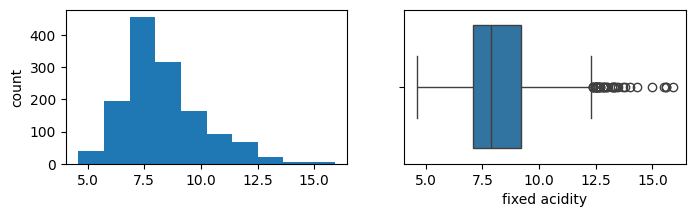

volatile acidity
Skew : 0.73


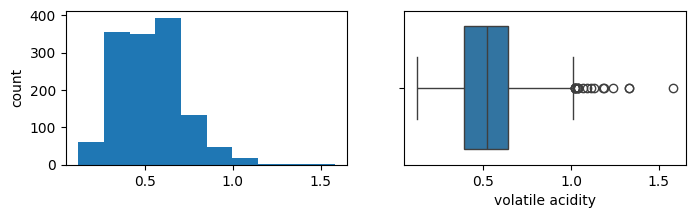

citric acid
Skew : 0.31


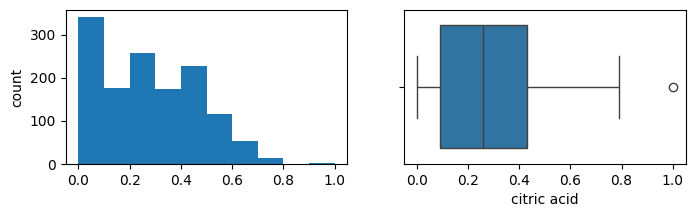

free sulfur dioxide
Skew : 1.23


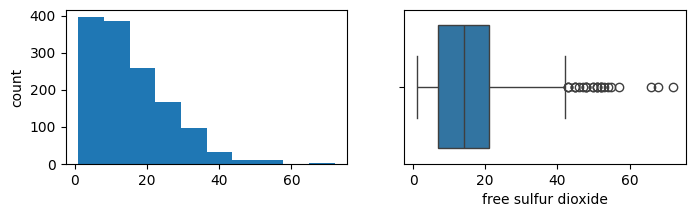

total sulfur dioxide
Skew : 1.54


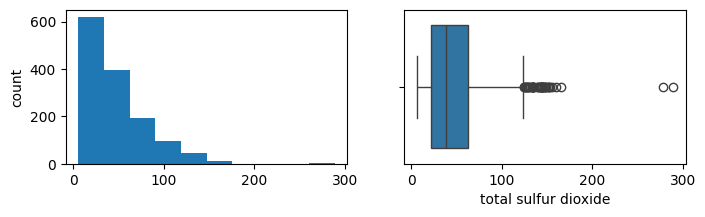

density
Skew : 0.04


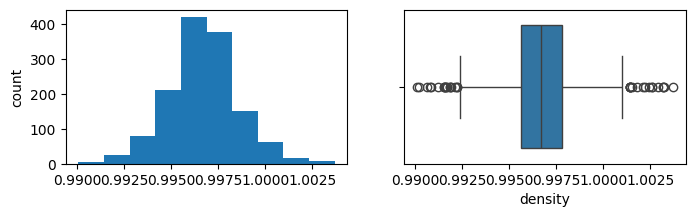

pH
Skew : 0.23


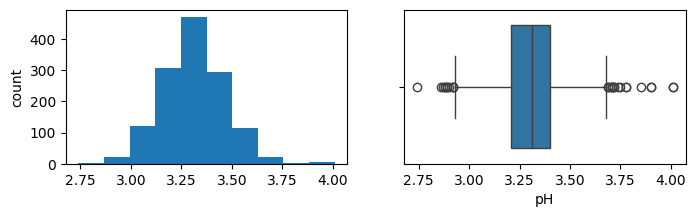

sulphates
Skew : 2.41


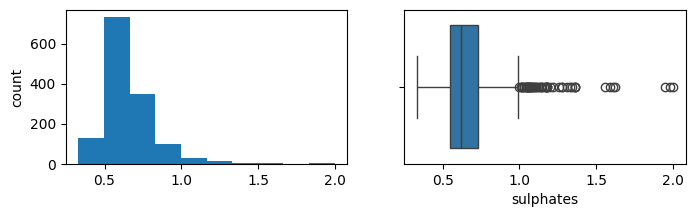

alcohol
Skew : 0.86


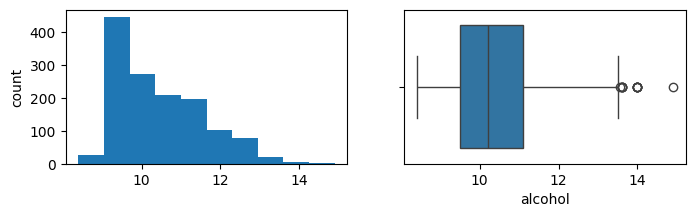

In [22]:
for col in num_cols:
  if col != output_column:
    print(col)
    print('Skew :', round(wine_outlier_pruned[col].skew(), 2))
    plt.figure(figsize = (8, 2))
    plt.subplot(1, 2, 1)
    wine_outlier_pruned[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=wine_outlier_pruned[col])
    plt.show()

#### **4.2.2. Data Transformation**
Highly skewed data for quantitative continuous variable can be normalzied with the help of log function

fixed acidity
Skew : 0.94


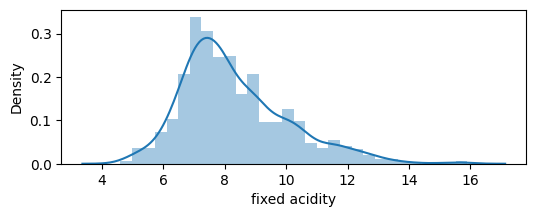

volatile acidity
Skew : 0.73


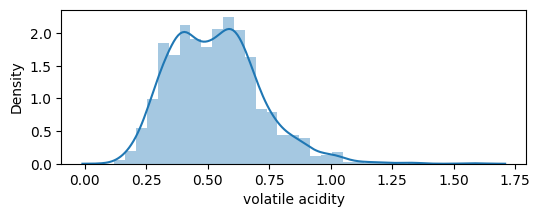

free sulfur dioxide
Skew : 1.23


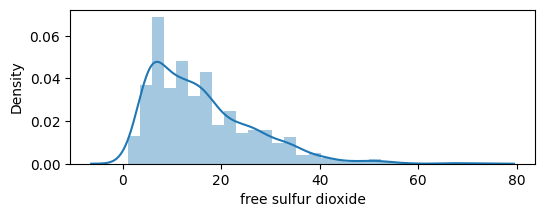

total sulfur dioxide
Skew : 1.54


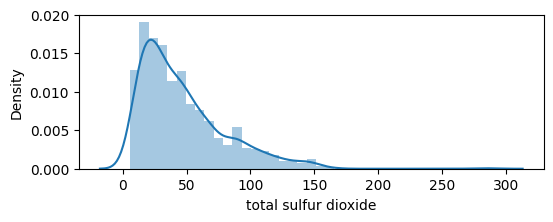

sulphates
Skew : 2.41


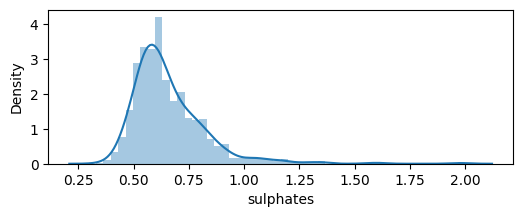

alcohol
Skew : 0.86


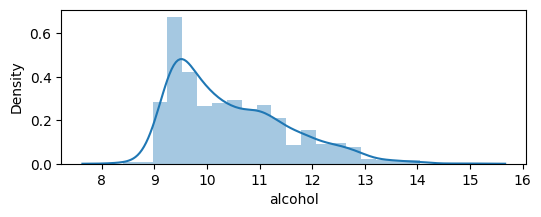

In [23]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])

        # Removing column from list of potential input to the models - data transformation
        input_columns.remove(colname)

        # Adding new column formed after data transformation into input column list
        input_columns.append(colname + '_log')

for col in num_cols:
  if col != output_column and round(wine_outlier_pruned[col].skew(), 2) > 0.65:
    print(col)
    print('Skew :', round(wine_outlier_pruned[col].skew(), 2))
    log_transform(wine_outlier_pruned, [col])

    plt.figure(figsize = (6, 2))
    plt.subplot(1, 1, 1)
    #Log transformation
    sns.distplot(wine_outlier_pruned[col], axlabel= col)
    plt.show()


In [24]:
# Newly constructred normalized columns for higly screwed continous data type columns
# These columns with have "_log" as suffix to identify them easily
wine_outlier_pruned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fixed acidity             1359 non-null   float64
 1   volatile acidity          1359 non-null   float64
 2   citric acid               1359 non-null   float64
 3   free sulfur dioxide       1359 non-null   float64
 4   total sulfur dioxide      1359 non-null   float64
 5   density                   1359 non-null   float64
 6   pH                        1359 non-null   float64
 7   sulphates                 1359 non-null   float64
 8   alcohol                   1359 non-null   float64
 9   quality                   1359 non-null   int64  
 10  fixed acidity_log         1359 non-null   float64
 11  volatile acidity_log      1359 non-null   float64
 12  free sulfur dioxide_log   1359 non-null   float64
 13  total sulfur dioxide_log  1359 non-null   float64
 14  sulphate

### **4.3.1 Feature Selection**
[Reference Link](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)
<br>Currently, we are not including any feature selection technique for this project

## **Model Training**

In [25]:
#Now seperate the dataset as response variable and feature variabes
X = wine_outlier_pruned[input_columns]
y = wine_outlier_pruned[output_column]

X_org = wine.drop(output_column, axis = 1)
y_org = wine[output_column]

In [26]:
########################### Alternative Data Set
# Using orginal columns instead of log columns
# as after coverting them in a normal form, their new normalized values are not providing better result
# and below data set after optimzation in SVC provdies 95% accuracy

# #Now seperate the dataset as response variable and feature variabes
# X = wine_outlier_pruned[['citric acid', 'density', 'pH', 'fixed acidity',
#        'volatile acidity', 'free sulfur dioxide',
#        'total sulfur dioxide', 'sulphates', 'alcohol']]
# y = wine_outlier_pruned[output_column]

# X_org = wine.drop(output_column, axis = 1)
# y_org = wine[output_column]

In [27]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_org_train, X_org_test, y_org_train, y_org_test = train_test_split(X_org, y_org, test_size = 0.2, random_state = 42)

In [28]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_org_train = sc.fit_transform(X_org_train)
X_org_test = sc.fit_transform(X_org_test)

In [29]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_org_train, y_org_train)
pred_org_rfc = rfc.predict(X_org_test)

In [30]:
# Stochastic Gradient Decent Classifier

sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

sgd = SGDClassifier(penalty=None)
sgd.fit(X_org_train, y_org_train)
pred_org_sgd = sgd.predict(X_org_test)

In [31]:
# Support Vector Classifier

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

svc = SVC()
svc.fit(X_org_train, y_org_train)
pred_org_svc = svc.predict(X_org_test)

## **Model Testing**

In [32]:
# Random Forest Classification

#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

print(classification_report(y_org_test, pred_org_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       238
           1       0.70      0.41      0.52        34

    accuracy                           0.90       272
   macro avg       0.81      0.69      0.73       272
weighted avg       0.89      0.90      0.89       272

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       238
           1       0.72      0.38      0.50        34

    accuracy                           0.90       272
   macro avg       0.82      0.68      0.72       272
weighted avg       0.89      0.90      0.89       272



In [33]:
# Stochastic Gradient Decent Classifier

print(classification_report(y_test, pred_sgd))

print(classification_report(y_org_test, pred_org_sgd))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       238
           1       0.45      0.68      0.54        34

    accuracy                           0.86       272
   macro avg       0.70      0.78      0.73       272
weighted avg       0.89      0.86      0.87       272

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       238
           1       0.56      0.41      0.47        34

    accuracy                           0.89       272
   macro avg       0.74      0.68      0.71       272
weighted avg       0.87      0.89      0.88       272



In [34]:
# Support Vector Classifier

print(classification_report(y_test, pred_svc))

print(classification_report(y_org_test, pred_org_svc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       238
           1       0.83      0.44      0.58        34

    accuracy                           0.92       272
   macro avg       0.88      0.71      0.77       272
weighted avg       0.91      0.92      0.91       272

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       238
           1       0.83      0.44      0.58        34

    accuracy                           0.92       272
   macro avg       0.88      0.71      0.77       272
weighted avg       0.91      0.92      0.91       272



## **Model Optimization**

In [35]:
# Grid Search CV

#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [36]:
# Training your data to find best parameters - On the processed dataset
grid_svc.fit(X_train, y_train)

#Best parameters for our svc model
print('Best Parameters for grid svc', grid_svc.best_params_)

Best Parameters for grid svc {'C': 1.1, 'gamma': 0.8, 'kernel': 'rbf'}


In [37]:
#Let's run our SVC again with the best parameters
svc2 = SVC(C = 1.1, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       238
           1       0.92      0.35      0.51        34

    accuracy                           0.92       272
   macro avg       0.92      0.67      0.73       272
weighted avg       0.92      0.92      0.90       272



In [38]:
# Training model to fit the best parameters - On orginial dataset
grid_svc.fit(X_org_train, y_org_train)

#Best parameters for our svc model
print('Best Parameters for grid svc', grid_svc.best_params_)

Best Parameters for grid svc {'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}


In [39]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 0.8, gamma =  0.1, kernel= 'rbf')
svc2.fit(X_org_train, y_org_train)
pred_org_svc2 = svc2.predict(X_org_test)
print(classification_report(y_org_test, pred_org_svc2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       238
           1       0.88      0.41      0.56        34

    accuracy                           0.92       272
   macro avg       0.90      0.70      0.76       272
weighted avg       0.92      0.92      0.91       272



## **Conclusion**

After apply different classification SVC outperform stochastic gradient machine learning, random forest. Furthermore on model opitmzation SVC accuracy further increased to 92%.
<br> as mentioned at the start of model traning section, if used alternative dataset the same accuracy further increased to 95%